In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve, precision_recall_curve, average_precision_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.impute import SimpleImputer

# Load dataset (replace 'your_dataset.csv' with the path to your CSV file)
data = pd.read_csv('/content/drive/MyDrive/MMLproj/CreditCardData.csv')

# Convert non-numeric columns to numeric format (e.g., remove currency symbols)
data['Amount'] = data['Amount'].replace('[^\d.]', '', regex=True).astype(float)

# Select relevant features and target variable
X = data.drop(['Transaction ID', 'Date', 'Time', 'Shipping Address', 'Fraud'], axis=1)
y = data['Fraud']

# Perform one-hot encoding on categorical columns
categorical_cols = ['Day of Week', 'Type of Card', 'Entry Mode', 'Type of Transaction', 'Merchant Group', 'Country of Transaction', 'Country of Residence', 'Gender', 'Bank']
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Handle class imbalance using oversampling (RandomOverSampler)
oversampler = RandomOverSampler(sampling_strategy='minority', random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_imputed, y_train)

# Initialize RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the RandomForestClassifier
rf_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_imputed)
y_pred_proba_rf = rf_model.predict_proba(X_test_imputed)[:, 1]

# Evaluate the RandomForestClassifier
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
average_precision_rf = average_precision_score(y_test, y_pred_proba_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

# Print evaluation metrics for RandomForestClassifier
print("RandomForestClassifier ROC AUC Score:", roc_auc_rf)
print("RandomForestClassifier Average Precision Score:", average_precision_rf)
print("RandomForestClassifier Classification Report:")
print(classification_rep_rf)


RandomForestClassifier ROC AUC Score: 0.9441857319291145
RandomForestClassifier Average Precision Score: 0.815289952688012
RandomForestClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     18545
           1       0.78      0.72      0.75      1455

    accuracy                           0.97     20000
   macro avg       0.88      0.85      0.87     20000
weighted avg       0.96      0.97      0.96     20000



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize GradientBoostingClassifier
gb_model = GradientBoostingClassifier(random_state=42)

# Train the GradientBoostingClassifier
gb_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_gb = gb_model.predict(X_test_imputed)
y_pred_proba_gb = gb_model.predict_proba(X_test_imputed)[:, 1]

# Evaluate the GradientBoostingClassifier
roc_auc_gb = roc_auc_score(y_test, y_pred_proba_gb)
average_precision_gb = average_precision_score(y_test, y_pred_proba_gb)
classification_rep_gb = classification_report(y_test, y_pred_gb)

# Print evaluation metrics for GradientBoostingClassifier
print("GradientBoostingClassifier ROC AUC Score:", roc_auc_gb)
print("GradientBoostingClassifier Average Precision Score:", average_precision_gb)
print("GradientBoostingClassifier Classification Report:")
print(classification_rep_gb)


GradientBoostingClassifier ROC AUC Score: 0.9628592473587512
GradientBoostingClassifier Average Precision Score: 0.8414105271944808
GradientBoostingClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     18545
           1       0.50      0.86      0.63      1455

    accuracy                           0.93     20000
   macro avg       0.74      0.90      0.80     20000
weighted avg       0.95      0.93      0.94     20000



In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize LogisticRegression
lr_model = LogisticRegression(random_state=42)

# Train the LogisticRegression
lr_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test_imputed)
y_pred_proba_lr = lr_model.predict_proba(X_test_imputed)[:, 1]

# Evaluate the LogisticRegression
roc_auc_lr = roc_auc_score(y_test, y_pred_proba_lr)
average_precision_lr = average_precision_score(y_test, y_pred_proba_lr)
classification_rep_lr = classification_report(y_test, y_pred_lr)

# Print evaluation metrics for LogisticRegression
print("LogisticRegression ROC AUC Score:", roc_auc_lr)
print("LogisticRegression Average Precision Score:", average_precision_lr)
print("LogisticRegression Classification Report:")
print(classification_rep_lr)


LogisticRegression ROC AUC Score: 0.9579103490256358
LogisticRegression Average Precision Score: 0.8130993822830831
LogisticRegression Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     18545
           1       0.49      0.86      0.62      1455

    accuracy                           0.92     20000
   macro avg       0.74      0.90      0.79     20000
weighted avg       0.95      0.92      0.93     20000



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Evaluating Ensemble (Voting)...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


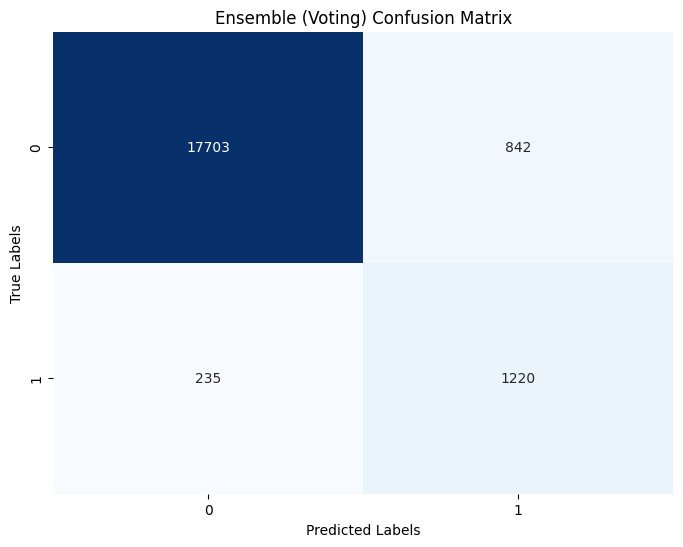

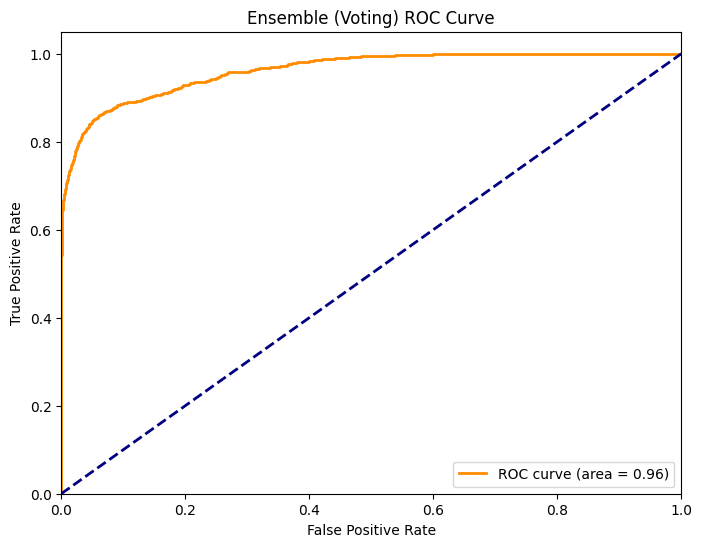

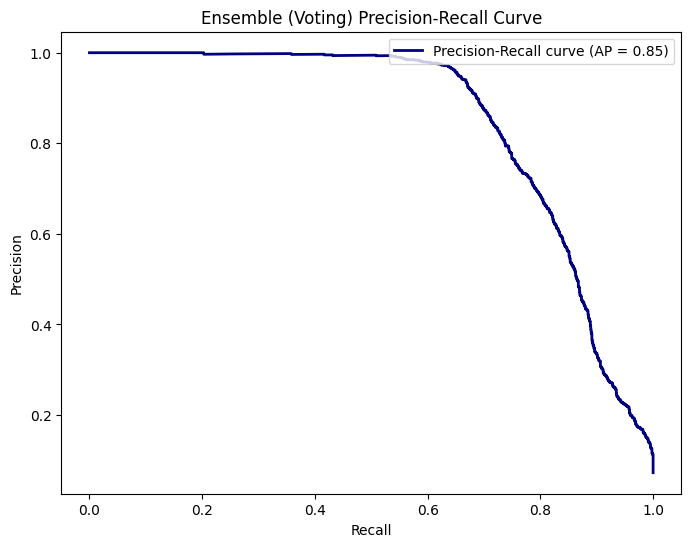

Ensemble (Voting) ROC AUC Score: 0.9627196778709538
Ensemble (Voting) Average Precision Score: 0.8462575725171491
Ensemble (Voting) Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97     18545
           1       0.59      0.84      0.69      1455

    accuracy                           0.95     20000
   macro avg       0.79      0.90      0.83     20000
weighted avg       0.96      0.95      0.95     20000



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, precision_recall_curve, average_precision_score
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.impute import SimpleImputer

# Define function to train, evaluate, and visualize an ensemble of models
def evaluate_ensemble_model(models, X_train, X_test, y_train, y_test):
    ensemble_model = VotingClassifier(estimators=models, voting='soft')  # Voting with soft voting (probability weights)
    ensemble_model_name = 'Ensemble (Voting)'

    print(f"Evaluating {ensemble_model_name}...")

    # Train the ensemble model
    ensemble_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = ensemble_model.predict(X_test)
    y_pred_proba = ensemble_model.predict_proba(X_test)[:, 1]

    # Evaluate the ensemble model
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    average_precision = average_precision_score(y_test, y_pred_proba)
    classification_rep = classification_report(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{ensemble_model_name} Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{ensemble_model_name} ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    # Plot precision-recall curve
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='navy', lw=2, label='Precision-Recall curve (AP = %0.2f)' % average_precision)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{ensemble_model_name} Precision-Recall Curve')
    plt.legend(loc='upper right')
    plt.show()

    # Display evaluation metrics
    print(f"{ensemble_model_name} ROC AUC Score:", roc_auc)
    print(f"{ensemble_model_name} Average Precision Score:", average_precision)
    print(f"{ensemble_model_name} Classification Report:")
    print(classification_rep)

# Load dataset (replace 'your_dataset.csv' with the path to your CSV file)
data = pd.read_csv('/content/drive/MyDrive/MMLproj/CreditCardData.csv')

# Convert non-numeric columns to numeric format (e.g., remove currency symbols)
data['Amount'] = data['Amount'].replace('[^\d.]', '', regex=True).astype(float)

# Select relevant features and target variable
X = data.drop(['Transaction ID', 'Date', 'Time', 'Shipping Address', 'Fraud'], axis=1)
y = data['Fraud']

# Perform one-hot encoding on categorical columns
categorical_cols = ['Day of Week', 'Type of Card', 'Entry Mode', 'Type of Transaction', 'Merchant Group', 'Country of Transaction', 'Country of Residence', 'Gender', 'Bank']
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Handle class imbalance using oversampling (RandomOverSampler)
oversampler = RandomOverSampler(sampling_strategy='minority', random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_imputed, y_train)

# Define multiple base classifiers for the ensemble
base_models = [
    ('RandomForest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('GradientBoosting', GradientBoostingClassifier(random_state=42)),
    ('LogisticRegression', LogisticRegression(random_state=42))
]

# Evaluate ensemble model using VotingClassifier
evaluate_ensemble_model(base_models, X_train_resampled, X_test_imputed, y_train_resampled, y_test)